In [1]:
import numpy as np
from scipy.stats.distributions import norm
import matplotlib.pylab as plt
import sys
sys.path.append('../zdrojaky')
from tsplot import tsplot
import statsmodels.tsa as tsa
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.api import qqplot
import warnings; warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = [10, 5]

/usr/lib/python3/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Odhad AR(I)MA modelu

V souboru `arimadata.npz` najdete časovou řadu, imitující vývoj hodnoty akcií na trhu. Máme zkusit nafitovat odpovídající model, odhadnout jeho parametry a analyzovat rezidua. K tomu všemu využijeme `statsmodels`.

**Úkol: do proměnné data natáhněte časovou řadu.**

In [2]:
fn = '../zdrojaky/arimadata.npz'
data = np.load(fn)
data = data['data']

**Úkol: proveďte analýzu pomocí funkce `tsplot()` a diskutujte vlastnosti časové řady.**

<Figure size 1080x216 with 0 Axes>

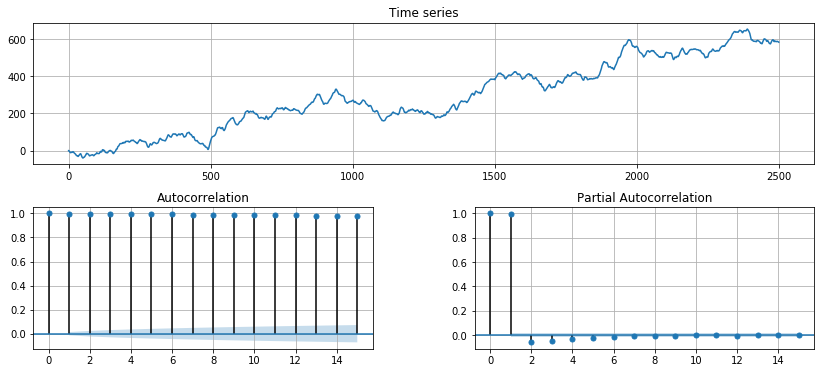

In [3]:
plt.figure(figsize=(15,3))
tsplot(data)

**Úkol: pokud se to zdá být výhodné, diferencujte časovou řadu a analyzujte výsledek. Bylo by výhodné diferencovat jednou? Dvakrát?**

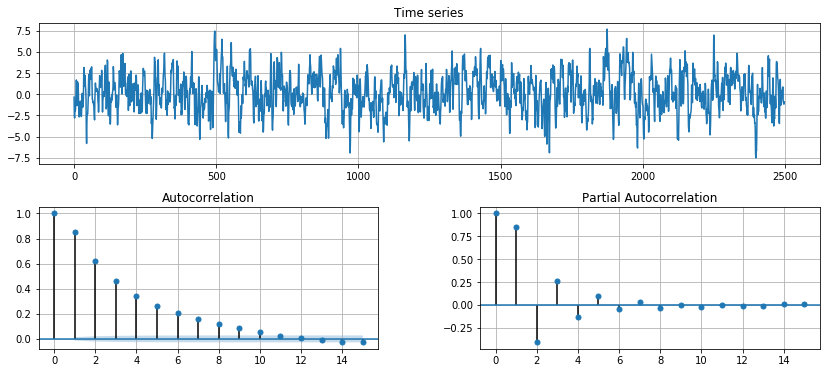

In [4]:
data_d1 = data[1:] - data[:-1]
#data_d1 = data_d1[1:] - data_d1[:-1]
tsplot(data_d1)

**Úkol: co soudit o výsledku? Jeví se jako stacionární časová řada? Jaký model budeme zkoušet?**

**Úkol: rozhodnete-li se pro ARMA model, můžeme zkusit najít řád pomocí funkce `tsa.stattools.arma_order_select_ic()`. Porovnejte výsledky pro různá informační kritéria.**

In [5]:
tsa.stattools.arma_order_select_ic(data_d1, trend='c', ic='bic', max_ar=2)

{'bic':               0            1            2
 0  11089.331035  8560.568210  7624.292587
 1   7803.954612  7101.196090  7108.916561
 2   7351.489571  7108.925059  7116.605604, 'bic_min_order': (1, 1)}

**Úkol: nafitujte vybraný model (bez trendu). V metodě `summary()` naleznete vlastnosti modelu. Diskutujte o nich.**

In [6]:
arma = ARMA(data_d1, order=(1,1)).fit(trend='c')
print(arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2499
Model:                     ARMA(1, 1)   Log Likelihood               -3534.951
Method:                       css-mle   S.D. of innovations              0.995
Date:                Tue, 05 Nov 2019   AIC                           7077.902
Time:                        16:13:59   BIC                           7101.196
Sample:                             0   HQIC                          7086.359
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2324      0.120      1.944      0.052      -0.002       0.467
ar.L1.y        0.7276      0.015     49.635      0.000       0.699       0.756
ma.L1.y        0.6377      0.016     39.358      0.0

**Úkol: proveďte analýzu reziduí, tj. (1) vykreslete řadu, ACF a PACF funkcí `tsplot()`**

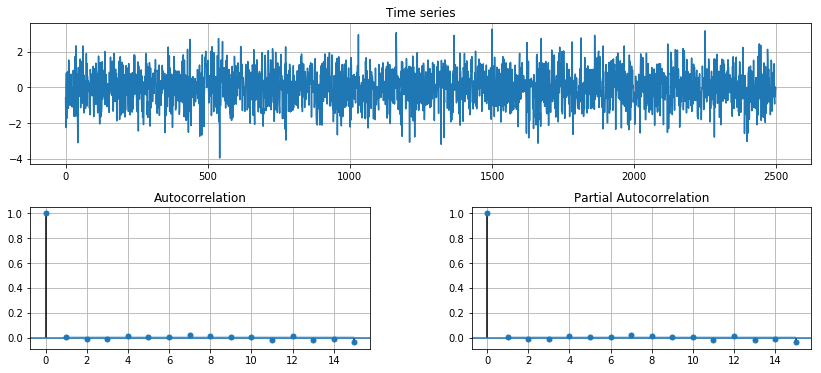

In [7]:
tsplot(arma.resid)
plt.show()

**(2) vykreslete qq-plot funkcí `qqplot()` - prozkoumejte její možnosti.**

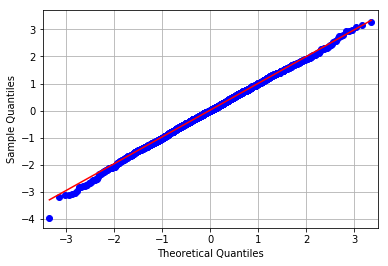

In [8]:
qqplot(arma.resid, line='q')
plt.show()

**(3) vykreslete histogram reziduí.**

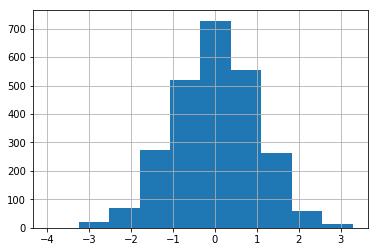

In [9]:
plt.hist(arma.resid)
plt.show()

**4. `arma` umí vytvořit in-sample predikce pro pozorované hodnoty pomocí metody `arma.predict()`. Vykreslete je spolu s původními daty. Zkuste poté do kódu výše vložit offset `trend='c'` a výsledky porovnejte. Zjistěte, jak funguje argument `dynamic`**

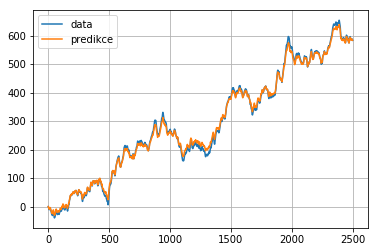

In [10]:
preds = arma.predict(dynamic=False)
plt.plot(data, label='data')
plt.plot(np.cumsum(preds), label='predikce')
plt.legend()

**5. Metoda `arma.predict()` umí rovněž predikce out-of-sample (forecasting). Zkuste udělat predikci příštích 50 hodnot a vykreslit je - použijte stejný kód jako výše.**

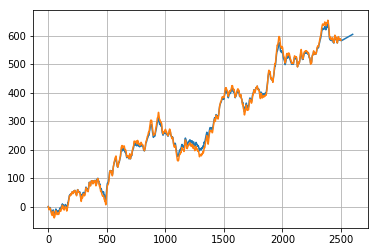

In [11]:
fcast_steps = 100
ndat = len(data)
fcast = arma.predict(start=0, end=ndat+fcast_steps)
plt.plot(np.cumsum(fcast))
plt.plot(data)

---
---

**Úkol: zkuste nafitovat model ARIMA pomocí `statsmodels.tsa.arima_model.ARIMA`**

In [12]:
res = ARIMA(data, (1,1,1)).fit(trend='nc')

In [13]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2499
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3536.820
Method:                       css-mle   S.D. of innovations              0.996
Date:                Tue, 05 Nov 2019   AIC                           7079.640
Time:                        16:14:01   BIC                           7097.111
Sample:                             1   HQIC                          7085.983
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.7304      0.015     50.068      0.000       0.702       0.759
ma.L1.D.y      0.6372      0.016     39.287      0.000       0.605       0.669
                                    Roots           